In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
heart=pd.read_csv('Heartdiseases.csv')

In [3]:
heart.head(5)

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,0,1,125,212,1,1,168,2,1,2,1,0
1,53,0,1,140,203,0,0,155,1,2,0,1,0
2,70,0,1,145,174,1,1,125,1,2,0,1,0
3,61,0,1,148,203,1,1,161,2,1,1,1,0
4,62,1,1,138,294,0,1,106,2,3,3,2,0


In [4]:
columns_to_drop=[ 'age']

In [5]:
heart=heart.drop(columns_to_drop,axis=1)

In [12]:
X =heart[ ['chest_pain_type', 'fasting_blood_sugar', 'rest_ecg']]

In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [19]:
n_clusters = 10  # Adjust as needed
n_init = 10  # Choose an appropriate value or set to 'auto' to suppress the warning
kmeans = KMeans(n_clusters=n_clusters, n_init=n_init, random_state=1)
heart['cluster'] = kmeans.fit_predict(X_scaled)

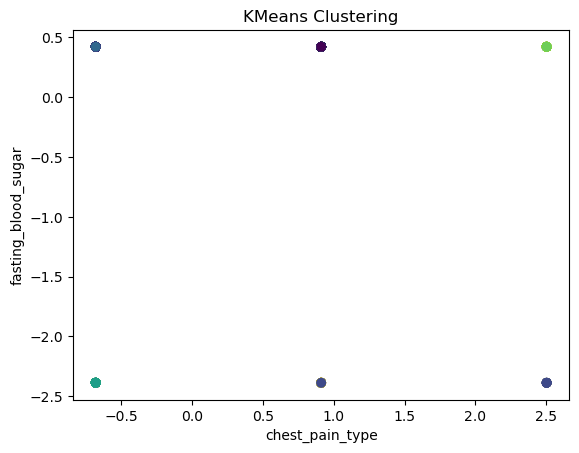

In [20]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=heart['cluster'], cmap='viridis')
plt.title('KMeans Clustering')
plt.xlabel('chest_pain_type')
plt.ylabel('fasting_blood_sugar')
plt.show()

In [21]:
cluster_means = heart.groupby('cluster').mean()
print(cluster_means)


             sex   chest_pain_type  resting_blood_pressure  cholestoral  \
cluster                                                                   
0        0.402878         2.000000              127.035971   235.561151   
1        0.265957         1.000000              131.822695   255.131206   
2        0.250000         2.325000              138.800000   261.075000   
3        0.296667         1.000000              128.360000   241.666667   
4        0.444444         2.000000              130.911111   253.700000   
5        0.233333         1.000000              130.800000   225.866667   
6        0.365385         1.000000              144.230769   267.096154   
7        0.000000         3.000000              142.696970   229.151515   
8        0.357143         3.000000              134.714286   229.285714   
9        0.193548         2.096774              139.451613   227.000000   

         fasting_blood_sugar  rest_ecg  Max_heart_rate  \
cluster                                  

In [18]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X_scaled, heart['cluster'])
print(f'Silhouette Score: {silhouette_avg}')


Silhouette Score: 0.584716213475215


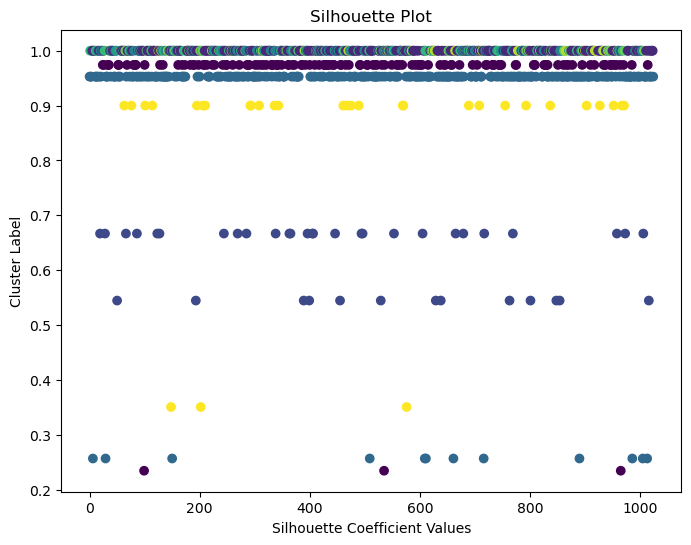

In [22]:
from sklearn.metrics import silhouette_samples
import matplotlib.pyplot as plt
import numpy as np

silhouette_values = silhouette_samples(X_scaled, heart['cluster'])

plt.figure(figsize=(8, 6))
plt.scatter(range(len(heart)), silhouette_values, c=heart['cluster'], cmap='viridis')
plt.title('Silhouette Plot')
plt.xlabel('Silhouette Coefficient Values')
plt.ylabel('Cluster Label')
plt.show()
